<a href="https://colab.research.google.com/github/Valiev-Koyiljon/Pytorch/blob/main/Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Data Augmentation with Pytorch

In [ ]:
from google.colab import drive

# This will prompt you to click on a link and authenticate with your Google account.
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:

import zipfile


#  path to the ZIP file
zip_file_path = "/content/drive/MyDrive/Dataset/train_data_v1.zip"
destination_folder = "/content/drive/MyDrive/Dataset/"
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_folder)


print("Folder extraction completed.")

Folder extraction completed.


In [ ]:

import torch
import torchvision
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Define the data augmentation transformations
data_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),  # Randomly crop and resize the image
    transforms.RandomHorizontalFlip(),  # Randomly flip the image horizontally
    transforms.RandomRotation(10),  # Randomly rotate the image by up to 10 degrees
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),  # Adjust brightness, contrast, saturation, and hue
    transforms.RandomGrayscale(p=0.2),  # Randomly convert the image to grayscale
    transforms.ToTensor(),  # Convert the image to a PyTorch tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize the image
])


In [ ]:
dataset = ImageFolder(root="/content/drive/MyDrive/Dataset/train_data/images/train", transform=data_transforms)


In [ ]:
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)



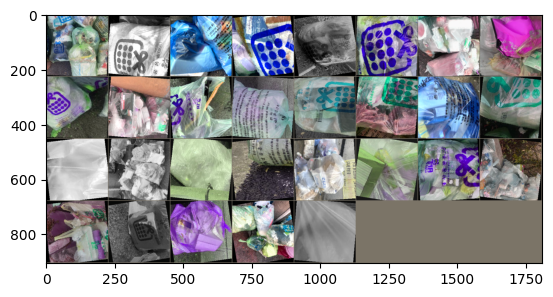

In [ ]:
# Visualize some augmented images
def imshow(inp):
    inp = inp.numpy().transpose((1, 2, 0))
    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)

# Get a batch of data and visualize it
inputs, _ = next(iter(dataloader))  # Ignore class labels
out = torchvision.utils.make_grid(inputs)
imshow(out)

plt.show()

## Data augmentation with Albumentations

In [39]:
!pip install -U albumentations

##Data Augmentation for annotated images for yolov

In [36]:
import os
from PIL import Image
import numpy as np
import torch
import torchvision.transforms as transforms
import cv2

# Define the input and output directories
input_image_folder = "/content/drive/MyDrive/Dataset/train_data/images/train/unknown"
input_annotation_folder = '/content/drive/MyDrive/Dataset/train_data/labels/train'
output_image_folder = '/content/drive/MyDrive/Dataset/train_data/images/train/augmented_images'
output_annotation_folder = "/content/drive/MyDrive/Dataset/train_data/labels/train/augmented_image_annotations"

# Define PyTorch transformations for image augmentations
data_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),  # Randomly crop and resize the image
    transforms.RandomHorizontalFlip(),  # Randomly flip the image horizontally
    transforms.RandomRotation(10),  # Randomly rotate the image by up to 10 degrees
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),  # Adjust brightness, contrast, saturation, and hue
    transforms.RandomGrayscale(p=0.2),  # Randomly convert the image to grayscale
    transforms.ToTensor(),  # Convert the image to a PyTorch tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize the image
])

# Function to read YOLOv format annotations and parse them
def read_yolo_annotations(annotation_file):
    with open(annotation_file, 'r') as file:
        lines = file.read().strip().split('\n')
    annotations = [line.split() for line in lines]
    return annotations

# List all image files in the input image folder
image_files = [f for f in os.listdir(input_image_folder) if f.endswith('.jpg')]

# Process each image and annotation file
for image_file in image_files:
    # Load the original image and annotations
    image = Image.open(os.path.join(input_image_folder, image_file))
    annotation_file = os.path.join(input_annotation_folder, image_file.replace('.jpg', '.txt'))
    annotations = read_yolo_annotations(annotation_file)

    # Apply data augmentation
    augmented_image = data_transforms(image)

    # Convert the augmented image to a NumPy array
    augmented_image = np.array(augmented_image)

    # Save the augmented image
    augmented_image_file = 'augmented_' + image_file
    augmented_image_path = os.path.join(output_image_folder, augmented_image_file)
    Image.fromarray(augmented_image).save(augmented_image_path)

    # Save augmented annotations
    with open(os.path.join(output_annotation_folder, 'augmented_' + image_file.replace('.jpg', '.txt')), 'w') as file:
        for annotation in annotations:
            file.write(' '.join(annotation) + '\n')


In [35]:
import os
import cv2
import numpy as np

# Define the input and output directories
input_image_folder = "/content/drive/MyDrive/Dataset/train_data/images/train/unknown"
input_annotation_folder = '/content/drive/MyDrive/Dataset/train_data/labels/train'
output_image_folder = '/content/drive/MyDrive/Dataset/train_data/images/train/augmented_images'
output_annotation_folder = "/content/drive/MyDrive/Dataset/train_data/labels/train/augmented_image_annotations"

# Function to read YOLOv format annotations and parse them
def read_yolo_annotations(annotation_file):
    with open(annotation_file, 'r') as file:
        lines = file.read().strip().split('\n')
    annotations = [line.split() for line in lines]
    return annotations

# Function to apply horizontal flipping to the image and update annotations
def horizontal_flip(image, annotations):
    flipped_image = cv2.flip(image, 1)
    flipped_annotations = []

    for annotation in annotations:
        class_id, x_center, y_center, width, height = map(float, annotation)
        x_center = 1.0 - x_center  # Flip the x-coordinate
        flipped_annotations.append([class_id, x_center, y_center, width, height])

    return flipped_image, flipped_annotations

# Function to apply rotation to the image and update annotations
def rotate_image(image, annotations, angle_degrees):
    center = (image.shape[1] // 2, image.shape[0] // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle_degrees, 1.0)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (image.shape[1], image.shape[0]))

    rotated_annotations = []
    for annotation in annotations:
        class_id, x_center, y_center, width, height = map(float, annotation)
        new_x, new_y = np.dot(rotation_matrix, [x_center, y_center, 1])
        rotated_annotations.append([class_id, new_x, new_y, width, height])

    return rotated_image, rotated_annotations

# Function to resize the image and update annotations
def resize_image(image, annotations, target_size):
    resized_image = cv2.resize(image, target_size)

    # Calculate the scaling factors for annotations
    scale_x = target_size[0] / image.shape[1]
    scale_y = target_size[1] / image.shape[0]

    resized_annotations = []
    for annotation in annotations:
        class_id, x_center, y_center, width, height = map(float, annotation)
        new_x_center = x_center * scale_x
        new_y_center = y_center * scale_y
        new_width = width * scale_x
        new_height = height * scale_y
        resized_annotations.append([class_id, new_x_center, new_y_center, new_width, new_height])

    return resized_image, resized_annotations

# List all image files in the input image folder
image_files = [f for f in os.listdir(input_image_folder) if f.endswith('.jpg')]

# Process each image and annotation file
for image_file in image_files:
    # Load the original image and annotations
    image = cv2.imread(os.path.join(input_image_folder, image_file))
    annotation_file = os.path.join(input_annotation_folder, image_file.replace('.jpg', '.txt'))
    annotations = read_yolo_annotations(annotation_file)

    # Apply augmentations
    flipped_image, flipped_annotations = horizontal_flip(image, annotations)
    rotated_image, rotated_annotations = rotate_image(image, annotations, angle_degrees=45)
    resized_image, resized_annotations = resize_image(image, annotations, target_size=(416, 416))

    # Save augmented images and annotations
    cv2.imwrite(os.path.join(output_image_folder, 'flipped_' + image_file), flipped_image)
    with open(os.path.join(output_annotation_folder, 'flipped_' + image_file.replace('.jpg', '.txt')), 'w') as file:
        for annotation in flipped_annotations:
            file.write(' '.join(map(str, annotation)) + '\n')

    cv2.imwrite(os.path.join(output_image_folder, 'rotated_' + image_file), rotated_image)
    with open(os.path.join(output_annotation_folder, 'rotated_' + image_file.replace('.jpg', '.txt')), 'w') as file:
        for annotation in rotated_annotations:
            file.write(' '.join(map(str, annotation)) + '\n')

    cv2.imwrite(os.path.join(output_image_folder, 'resized_' + image_file), resized_image)
    with open(os.path.join(output_annotation_folder, 'resized_' + image_file.replace('.jpg', '.txt')), 'w') as file:
        for annotation in resized_annotations:
            file.write(' '.join(map(str, annotation)) + '\n')


2nd Way

In [ ]:
import os
import cv2
import imgaug as ia
import imgaug.augmenters as iaa
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage

# Define your input and output directories
input_directory = "/content/drive/MyDrive/Dataset/train_data/images/train/unknown"
output_directory = "content/drive/MyDrive/Dataset/train_data/images/augmented_images"

# Create the output directory if it doesn't exist
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Initialize the augmenter
augmentor = iaa.Sequential([
    iaa.Fliplr(0.5),  # Horizontal flip with a 50% chance
    iaa.Affine(rotate=(-30, 30)),  # Rotate images between -30 and 30 degrees
    iaa.GaussianBlur(sigma=(0, 1.0)),  # Apply Gaussian blur with a sigma between 0 and 1.0
    iaa.Multiply((0.5, 1.5), per_channel=0.5),  # Multiply the brightness of images (per channel)
    iaa.Crop(percent=(0, 0.1))  # Crop 0-10% of the image
])

# Iterate through the images in the input directory
for filename in os.listdir(input_directory):
    if filename.endswith(".jpg"):  # Assuming your images are in JPEG format
        image = cv2.imread(os.path.join(input_directory, filename))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB format

        # Define bounding boxes (if you have annotations)
        # Here, I'm assuming there's a single bounding box for the entire image
        bbs = BoundingBoxesOnImage([BoundingBox(x1=0, y1=0, x2=image.shape[1], y2=image.shape[0])], shape=image.shape)

        # Apply augmentations to the image and bounding boxes
        augmented_image, augmented_bbs = augmentor(image=image, bounding_boxes=bbs)

        # Save the augmented image and update bounding boxes
        augmented_image = cv2.cvtColor(augmented_image, cv2.COLOR_RGB2BGR)  # Convert back to BGR format
        augmented_filename = os.path.join(output_directory, f"augmented_{filename}")
        cv2.imwrite(augmented_filename, augmented_image)

# Make sure to adapt this code to your specific needs and annotation format if you have bounding box annotations.
